# 4 การทดลอง
## 4.1 อนุกรมฟูเรียร์
ให้ x(t) เป็นสัญญาณมีคาบ นิยามด้วย
$$ x(t) = \sum_{n=-\infty}^{+\infty} \Pi(\frac{t-nT_0}{\tau}), $$
เมื่อ
$$
\Pi(t) = \left\{
    \begin{array}{ll}
        1 \text{ ,}  |t| < \frac{1}{2} \\
        \frac{1}{2} \text{ ,} |t| = \frac{1}{2} \\
        0 \text{ otherwise}
    \end{array}
\right.
$$
นิยามฟังก์ชันพัลซ์ในสมการ (6) ด้วยคําสั่งใน Sage ต่อไปนี้ ตามด้วย shift+enter

In [1]:
def rect(t, tau):
    rect_u = unit_step(t + tau / 2) - unit_step(t - tau / 2)
    return rect_u

define function for computing Fourier series coefficient

In [2]:
def xn(n, T0, tau):
    if n!=0:
        xnv = (1 / T0 * integral(rect(t, tau) * e^(-i*n*2*pi*t/T0),t,-tau/2,tau/2)).simplify_full()
    else:
        xnv = tau / T0
    return xnv

In [3]:
#----------------------------------------------------------------
# show pulse function and Fourier series coefficients
# i=sqrt(-1)
#----------------------------------------------------------------
n,T0,tau,t,nv=var("n,T0,tau,t,nv")
assume(tau>0, T0>tau/2)
# next, show rectandular function
show("rect(t,τ)=",rect(t,tau))
# next show Fourier Series Coefficient, xn
show("xₙ= ",xn(n,T0,tau))

'rect(t,τ)=' unit_step(t + 1/2*tau) - unit_step(t - 1/2*tau)

'xₙ= ' sin(pi*n*tau/T0)/(pi*n)

## 4.2 ความสัมพันธ์ระหว่างสัญญาณและสเปกตรัม     
มื่อ $T_0 = 6$ พิจารณาความสัมพันธ์ระหว่างสัญญาณและสเปกตรัม เมื่อเปลี่ยนแปลงความกว้างของพัลซ์ $τ$ เป็น $1, 2, 3$ ตามลําดับ

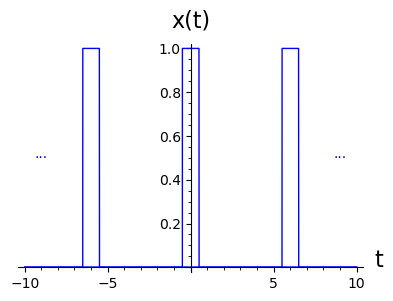

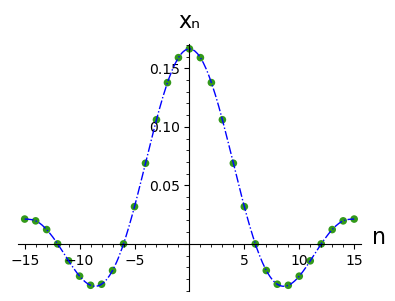

In [4]:
# Let x(t) be periodic signal as in Fig. 1
# We will study the relation between pulse width (tau)
# and its discrete spectrum
T0=6
@interact
def _(tau=slider(1,3,step_size=1)):
    tauv=tau
    P=[(n,xn(n,T0,tauv)) for n in srange(-15,16)]
    S1=plot(rect(t,tauv),-10,10,figsize=(4,3),axes_labels=(["t","x(t)"]))
    S2=plot(rect(t-T0,tauv),-10,10,figsize=(4,3))
    S3=plot(rect(t+T0,tauv),-10,10,figsize=(4,3))
    S4=text("···",(-9,0.5))
    S5=text("···",(9,0.5))
    show(S1+S2+S3+S4+S5)
    show(points(P, rgbcolor=(0.2,0.6, 0.1), pointsize=30) \
    +plot(spline(P), -15, 15,figsize=(4,3),\
    axes_labels=(["n","xₙ"]),linestyle="-."))

## 4.3 ความสัมพันธ์ระหว่างกําลังของสัญญาณและทฤษฎีบทปาร์เซอวาล
คำนวณหากําลังในสัญญาณ จากโดเมนเวลา ด้วยคําสั่งใน Sage ต่อไปนี้

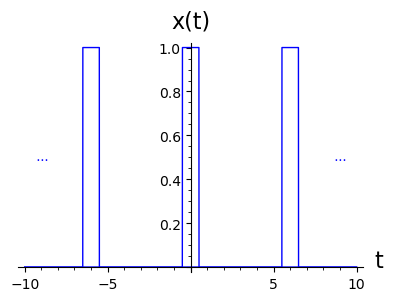

'Px_{time}=' 0.16667

In [5]:
# Power Content (Compute in time domain)
def rect(t,tau):
    rect_u=unit_step(t+tau/2)-unit_step(t-tau/2)
    return rect_u

# define function for computing power content in time domain
def power_time(x,tauv):
    x_mag=abs(x)
    Px_t=1/T0*integral(x_mag^2,t,-tauv/2,tauv/2)
    return Px_t

# main to caculate the power-content in time domain
#n,T0,tau,t,nv,tauv=var("n,T0,tau,t,nv,tauv") (previos)
n,t,nv,tauv=var("n,t,nv,tauv")
#assume(tau>0, T0>tau/2) (previos)
T0=6
    
@interact
def _(tau=slider(1,3,step_size=1)):
    tauv=tau
    x(t)=rect(t,tauv)
    Px_time=power_time(x,tauv)
    S1=plot(rect(t,tauv),-10,10,figsize=(4,3),\
    axes_labels=(["t","x(t)"]))
    S2=plot(rect(t-T0,tauv),-10,10,figsize=(4,3))
    S3=plot(rect(t+T0,tauv),-10,10,figsize=(4,3))
    S4=text("$\cdots$",(-9,0.5))
    S5=text("$\cdots$",(9,0.5))
    show(S1+S2+S3+S4+S5)
    show("Px_{time}=",RR(Px_time).n(digits=5))

คำนวณหากําลังในสัญญาณ จากสัมประสิทธิ์ของอนุกรมฟูเรียร์ ด้วยคําสั่งใน Sage ต่อไปนี้

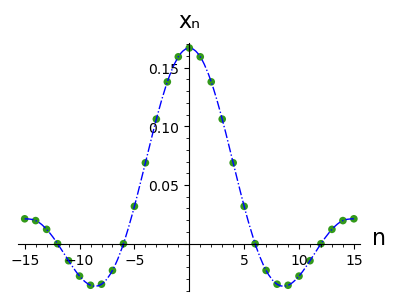

'P_{xₙ}=' 0.16567

In [6]:
# Power Content (Compute using Fourier series coefficient)
def rect(t,tau):
    rect_u=unit_step(t+tau/2)-unit_step(t-tau/2)
    return rect_u

def xn(n,T0,tau):
    if n!=0:
        xnv=(1/T0*integral(rect(t,tau)*e^(-i*n*2*pi*t/T0),t,-tau/2,tau/2)) \
        .simplify_full()
    else:
        xnv=tau/T0
    return xnv

# define function for numerical computing of the power content using Fourier series coefficients
def power_coe(s,tauv):
    sum = 0
    for n in srange(-100,101):
        if n!=0:
            sum += (s(n))^2
        else:
            sum += (tauv/T0)^2
    return sum

# Main Power Content (Compute using Fourier series coefficient)
n,T0,tau,t,nv,tauv=var("n,T0,tau,t,nv,tauv")
assume(tau>0, T0>tau/2)
T0=6

@interact
def _(tau=slider(1,3,step_size=1)):
    tauv=tau
    P=[(m,xn(m,T0,tauv)) for m in srange(-15,16)]
    s(n)=xn(n,T0,tauv)
    Px_coe=power_coe(s,tauv)
    show(points(P, rgbcolor=(0.2,0.6, 0.1), pointsize=30) \
    + plot(spline(P), -15, 15,figsize=(4,3),\
           axes_labels=(["n","xₙ"]),linestyle="-."))
    show("P_{xₙ}=",RR(Px_coe).n(digits=5)) #RR mean real number